In [1]:
from imports import *

In [2]:
import pickle_utils

In [3]:
from data_exploration import *

In [4]:
from math import log

In [5]:
from scipy.ndimage import gaussian_filter1d

In [6]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
data_path = 'C:\\Users\\homol\\Documents\\diplomamunka\\adat\\tweets_2015_2020'

In [8]:
save_path = 'C:\\Users\\homol\\Documents\\diplomamunka\\adat\\'

In [9]:
weekday_stock_metrics_df_list = load_pickle(save_path+'weekday_stock_metrics_df_list.p')
weekday_sent_df_list = load_pickle(save_path+'weekday_sent_df_list.p')
weekday_stock_metrics_df_list[0]

,ticker_symbol,date,close_value,volume,open_value,high_value,low_value,weekday_digit,logreturn,open_close_delta
0,TSLA,2015-01-01,222.41,2392947,223.090,225.68,222.2500,3,NaN,NaN
1,TSLA,2015-01-02,219.31,4753239,222.870,223.25,213.2600,4,-0.014036,-0.002064
2,TSLA,2015-01-05,210.09,5355485,214.550,216.50,207.1626,0,-0.042950,0.022186
3,TSLA,2015-01-06,211.28,6257651,210.060,214.20,204.2100,1,0.005648,0.000143
4,TSLA,2015-01-07,210.95,2965330,213.350,214.78,209.7800,2,-0.001563,-0.009702
...,...,...,...,...,...,...,...,...,...,...
1402,TSLA,2020-05-22,816.88,9987475,822.174,831.78,812.0000,4,-0.013038,0.006600
1403,TSLA,2020-05-26,818.87,8089736,834.500,834.60,815.7050,1,0.002433,-0.021114
1404,TSLA,2020-05-27,820.23,11549530,820.860,827.71,785.0000,2,0.001659,-0.002424
1405,TSLA,2020-05-28,805.81,7275774,813.510,824.75,801.6900,3,-0.017737,0.008261


In [10]:
weekday_sent_df_list[0]

,date,pos_ratio,neg_ratio
0,2015-01-01,0.034483,0.034483
1,2015-01-05,0.049383,0.086420
2,2015-01-06,0.062500,0.041667
3,2015-01-07,0.073171,0.121951
4,2015-01-08,0.031008,0.069767
...,...,...,...
1038,2019-12-24,0.122059,0.061765
1039,2019-12-25,0.114907,0.074534
1040,2019-12-26,0.139513,0.046816
1041,2019-12-30,0.125864,0.089903


In [11]:
weekday_stock_sent_df_list = []
for i,sent_df in enumerate(weekday_sent_df_list):
    stock_sent_df = pd.merge(weekday_stock_metrics_df_list[i],sent_df,on='date')
    weekday_stock_sent_df_list.append(stock_sent_df)
    
weekday_stock_sent_df_list[0]

,ticker_symbol,date,close_value,volume,open_value,high_value,low_value,weekday_digit,logreturn,open_close_delta,pos_ratio,neg_ratio
0,TSLA,2015-01-01,222.410,2392947,223.09,225.6800,222.2500,3,NaN,NaN,0.034483,0.034483
1,TSLA,2015-01-05,210.090,5355485,214.55,216.5000,207.1626,0,-0.042950,0.022186,0.049383,0.086420
2,TSLA,2015-01-06,211.280,6257651,210.06,214.2000,204.2100,1,0.005648,0.000143,0.062500,0.041667
3,TSLA,2015-01-07,210.950,2965330,213.35,214.7800,209.7800,2,-0.001563,-0.009702,0.073171,0.121951
4,TSLA,2015-01-08,210.615,3434901,212.81,213.7999,210.0100,3,-0.001589,-0.008740,0.031008,0.069767
...,...,...,...,...,...,...,...,...,...,...,...,...
1038,TSLA,2019-12-24,425.250,8054720,418.36,425.4700,412.6875,1,0.014281,0.002056,0.122059,0.061765
1039,TSLA,2019-12-25,425.250,8054720,418.36,425.4700,412.6875,2,0.000000,0.016469,0.114907,0.074534
1040,TSLA,2019-12-26,430.940,10648290,427.91,433.4800,426.3500,3,0.013292,-0.006216,0.139513,0.046816
1041,TSLA,2019-12-30,414.700,12601270,428.79,429.0000,409.2589,0,-0.037113,0.003708,0.125864,0.089903


In [13]:
tesla_df = weekday_stock_sent_df_list[0]
apple_df = weekday_stock_sent_df_list[1]
goog_df = weekday_stock_sent_df_list[2]
googl_df = weekday_stock_sent_df_list[3]
amazon_df = weekday_stock_sent_df_list[4]
microsoft_df = weekday_stock_sent_df_list[5]

In [100]:
import matplotlib.dates as mdates

def get_given_period_plot(df,start,end):
    reduced_df = df.loc[(df['date']>= start)& (df['date']<= end)].reset_index(drop=True)
    try:
        start_date = datetime.date(start.year,start.month+1,start.day)
        end_date = datetime.date(start.year,start.month+2,start.day)
    except:
        start_date = datetime.date(start.year,start.month+1,start.day)
        end_date = datetime.date(start.year+1,1,start.day)
        
    plt.plot(reduced_df['date'],reduced_df['logreturn'],color='green')   
    plt.plot(reduced_df['date'],reduced_df['pos_ratio'],color='red')
    plt.plot(reduced_df['date'],reduced_df['neg_ratio'],color='blue')
    
    plt.axvspan(*mdates.date2num([start_date,end_date]), color='red', alpha=0.5)
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

In [101]:
def get_only_stock_plot(df,start,end):
    reduced_df = df.loc[(df['date']>= start)& (df['date']<= end)].reset_index(drop=True)
    try:
        start_date = datetime.date(start.year,start.month+1,start.day)
        end_date = datetime.date(start.year,start.month+2,start.day)
    except:
        start_date = datetime.date(start.year,start.month+1,start.day)
        end_date = datetime.date(start.year+1,1,start.day)
    
    plt.plot(reduced_df['date'],reduced_df['logreturn'],color='green')
    
    plt.axvspan(*mdates.date2num([start_date,end_date]), color='red', alpha=0.5)
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

# 1.) Tesla

## 2017 JULY
In July 2017, Tesla's stock dropped after a tweet from Elon Musk suggesting that the company's new Model 3 sedan was experiencing production delays.

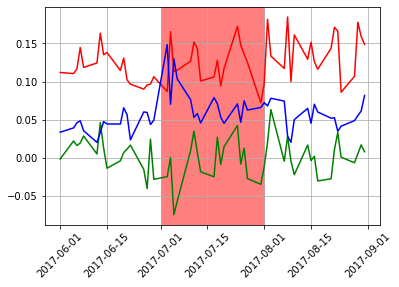

In [93]:
get_given_period_plot(tesla_df,datetime.date(2017,6,1),datetime.date(2017,8,31))

## 2018 MAY
In May 2018, Elon Musk's tweet about taking Tesla private at $420 per share led to a significant increase in the stock price, but also led to scrutiny from the SEC and lawsuits from investors.

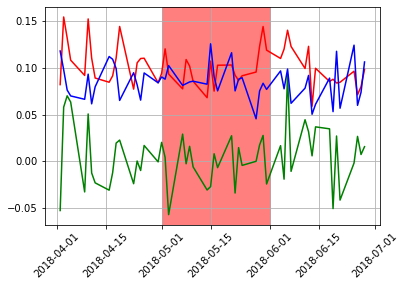

In [95]:
get_given_period_plot(tesla_df,datetime.date(2018,4,1),datetime.date(2018,6,30))

## 2019 SEPTEMBER
In September 2019, Tesla's stock dropped after a tweet from Elon Musk suggesting that the company's new "cybertruck" had received 146,000 pre-orders, which was lower than many analysts had expected.

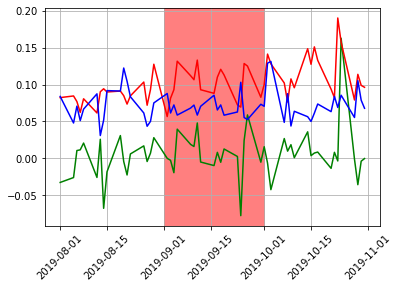

In [96]:
get_given_period_plot(tesla_df,datetime.date(2019,8,1),datetime.date(2019,10,31))

# 2.) Apple

## 2016 FEBRUARY
In February 2016, Apple's stock dropped after a tweet from billionaire investor Carl Icahn suggesting that he had sold his entire stake in the company due to concerns about China's economic slowdown.

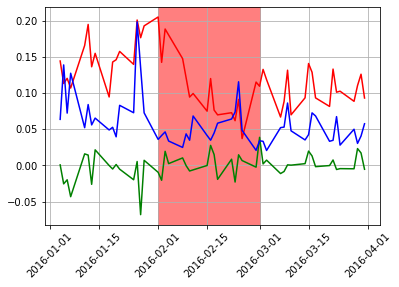

In [97]:
get_given_period_plot(apple_df,datetime.date(2016,1,1),datetime.date(2016,3,31))

## 2018 AUGUST
In August 2018, Apple's stock rose after the company became the first publicly traded US company to reach a $1 trillion market capitalization, which was widely discussed on social media and in financial news.

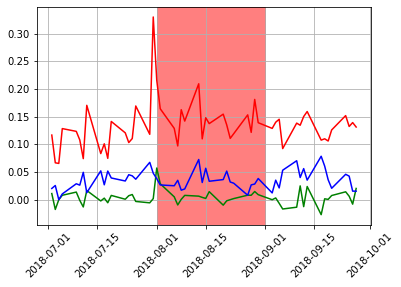

In [98]:
get_given_period_plot(apple_df,datetime.date(2018,7,1),datetime.date(2018,9,30))

## 2018 DECEMBER
In December 2018, Apple's stock dropped after reports of weak iPhone sales in China, which were widely discussed on social media and in the news.

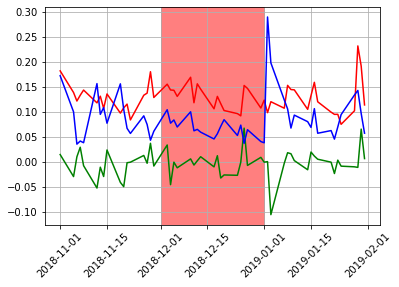

In [102]:
get_given_period_plot(apple_df,datetime.date(2018,11,1),datetime.date(2019,1,31))

## 2019 AUGUST
In August 2019, Apple's stock rose after a report that the company was planning to launch a new subscription bundle that would include its streaming, music, and news services, which was widely discussed on social media and in financial news.

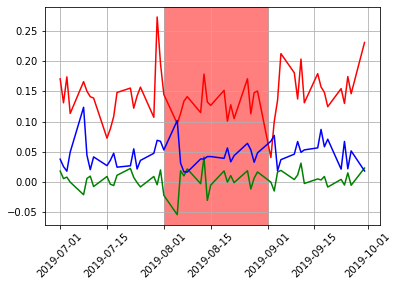

In [103]:
get_given_period_plot(apple_df,datetime.date(2019,7,1),datetime.date(2019,9,30))

# 3.) Google

## 2016 JUNE
In June 2016, Google's stock was impacted by the "Brexit" vote in the UK, which caused market uncertainty and volatility.

GOOG


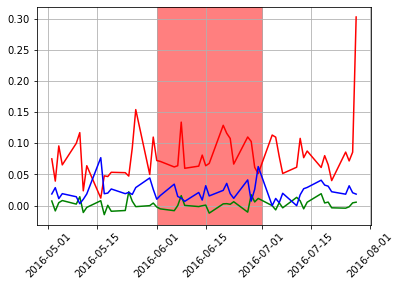

GOOGL


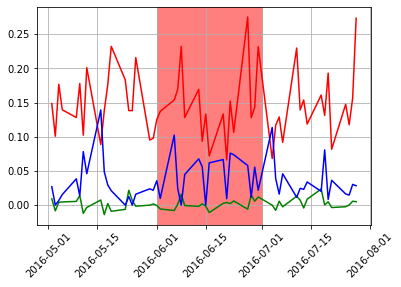

In [104]:
print('GOOG')
get_given_period_plot(goog_df,datetime.date(2016,5,1),datetime.date(2016,7,31))
print('GOOGL')
get_given_period_plot(googl_df,datetime.date(2016,5,1),datetime.date(2016,7,31))

GOOG


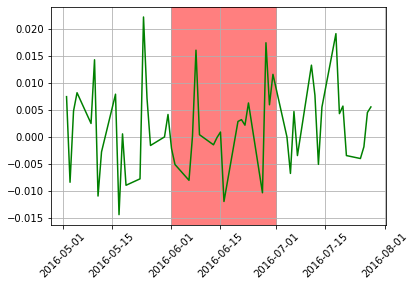

GOOGL


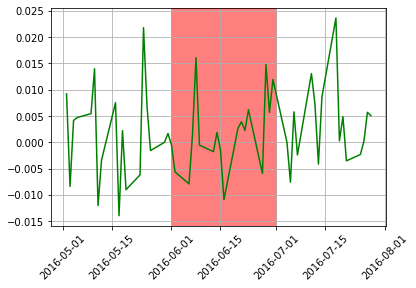

In [105]:
print('GOOG')
get_only_stock_plot(goog_df,datetime.date(2016,5,1),datetime.date(2016,7,31))
print('GOOGL')
get_only_stock_plot(googl_df,datetime.date(2016,5,1),datetime.date(2016,7,31))

## 2017 AUGUST
In August 2017, Google's stock dropped after a memo from an employee criticizing the company's diversity initiatives went viral on social media, sparking controversy and debate.

GOOG


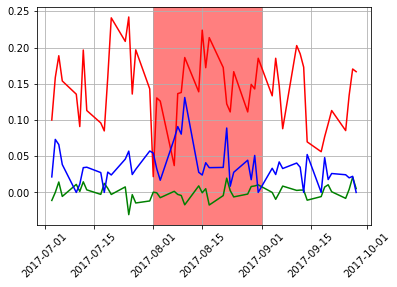

GOOGL


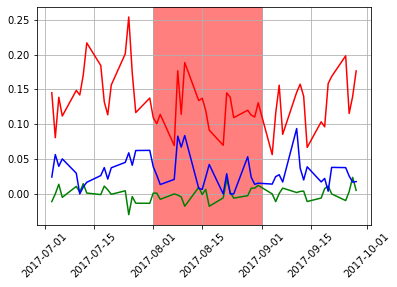

In [106]:
print('GOOG')
get_given_period_plot(goog_df,datetime.date(2017,7,1),datetime.date(2017,9,30))
print('GOOGL')
get_given_period_plot(googl_df,datetime.date(2017,7,1),datetime.date(2017,9,30))

GOOG


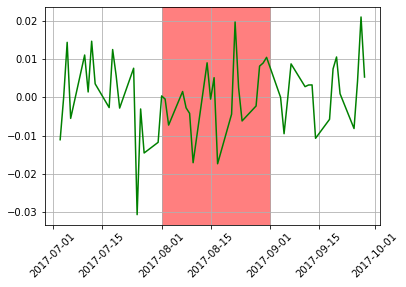

GOOGL


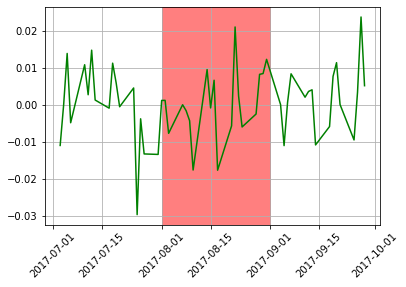

In [107]:
print('GOOG')
get_only_stock_plot(goog_df,datetime.date(2017,7,1),datetime.date(2017,9,30))
print('GOOGL')
get_only_stock_plot(googl_df,datetime.date(2017,7,1),datetime.date(2017,9,30))

## 2018 JULY
In July 2018, Google's stock rose after a strong earnings report that beat analyst expectations, which was widely discussed on social media and in financial news.

GOOG


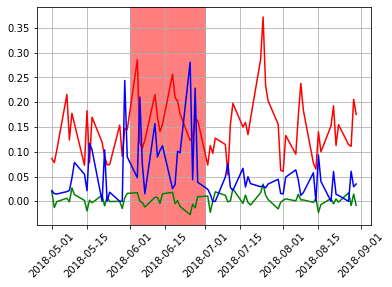

GOOGL


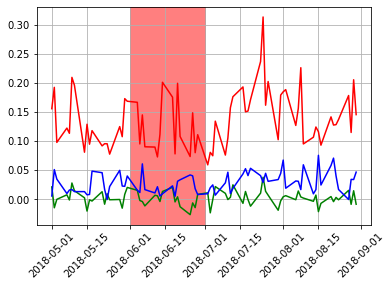

In [108]:
print('GOOG')
get_given_period_plot(goog_df,datetime.date(2018,5,1),datetime.date(2018,8,31))
print('GOOGL')
get_given_period_plot(googl_df,datetime.date(2018,5,1),datetime.date(2018,8,31))

GOOG


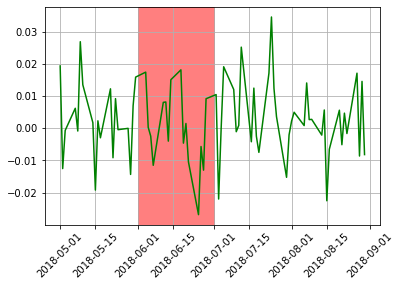

GOOGL


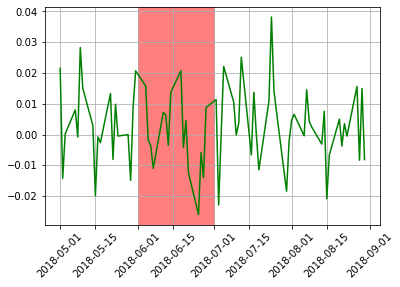

In [109]:
print('GOOG')
get_only_stock_plot(goog_df,datetime.date(2018,5,1),datetime.date(2018,8,31))
print('GOOGL')
get_only_stock_plot(googl_df,datetime.date(2018,5,1),datetime.date(2018,8,31))

## 2019 MARCH
In March 2019, Google's stock dropped after President Trump criticized the company on Twitter for alleged bias against conservative voices, sparking concerns about political interference in tech companies.

GOOG


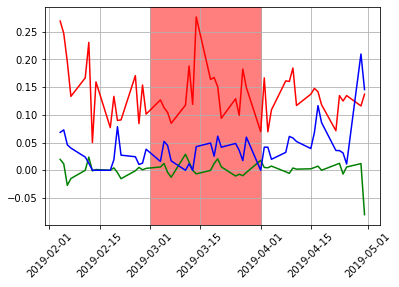

GOOGL


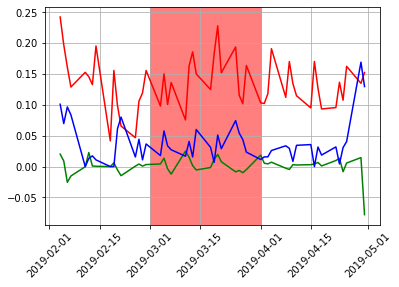

In [110]:
print('GOOG')
get_given_period_plot(goog_df,datetime.date(2019,2,1),datetime.date(2019,4,30))
print('GOOGL')
get_given_period_plot(googl_df,datetime.date(2019,2,1),datetime.date(2019,4,30))

GOOG


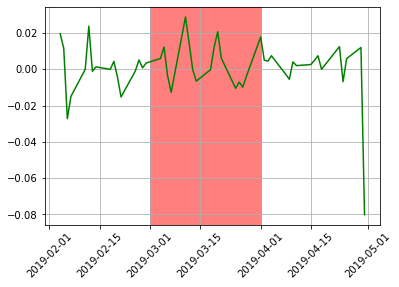

GOOGL


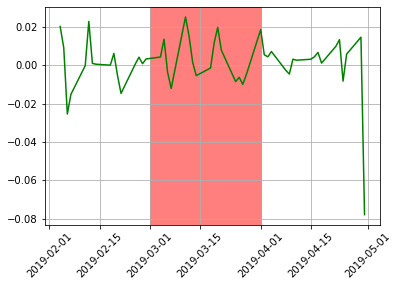

In [111]:
print('GOOG')
get_only_stock_plot(goog_df,datetime.date(2019,2,1),datetime.date(2019,4,30))
print('GOOGL')
get_only_stock_plot(googl_df,datetime.date(2019,2,1),datetime.date(2019,4,30))

# 4.) Amazon

## 2017 JUNE
In June 2017, Amazon's stock dropped after the company announced plans to acquire Whole Foods Market, which led to concerns about the impact on the grocery industry and potential antitrust issues.

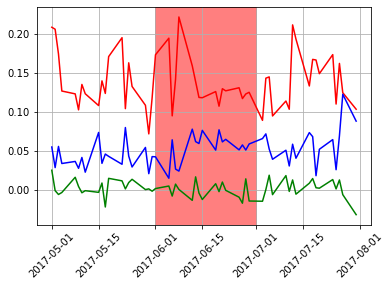

In [112]:
get_given_period_plot(amazon_df,datetime.date(2017,5,1),datetime.date(2017,7,31))

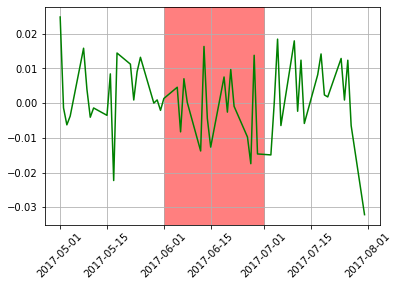

In [113]:
get_only_stock_plot(amazon_df,datetime.date(2017,5,1),datetime.date(2017,7,31))

## 2018 AUGUST
In August 2018, Amazon's stock dropped after a tweet from President Trump criticizing the company's business practices and accusing it of hurting small businesses.

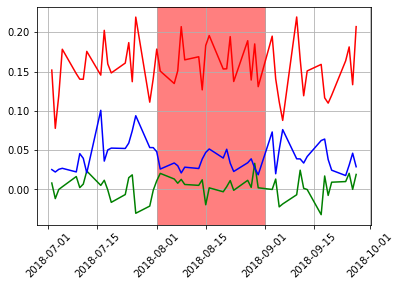

In [114]:
get_given_period_plot(amazon_df,datetime.date(2018,7,1),datetime.date(2018,9,30))

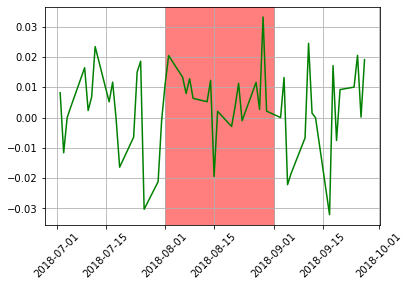

In [115]:
get_only_stock_plot(amazon_df,datetime.date(2018,7,1),datetime.date(2018,9,30))

## 2019 APRIL
In April 2019, Amazon's stock rose after a strong earnings report that beat analyst expectations, which was widely discussed on social media and in financial news.

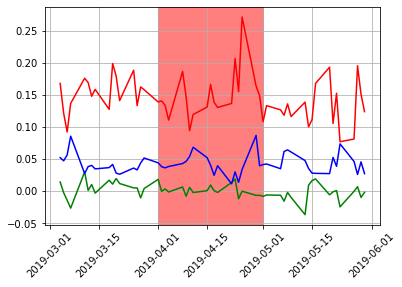

In [116]:
get_given_period_plot(amazon_df,datetime.date(2019,3,1),datetime.date(2019,5,31))

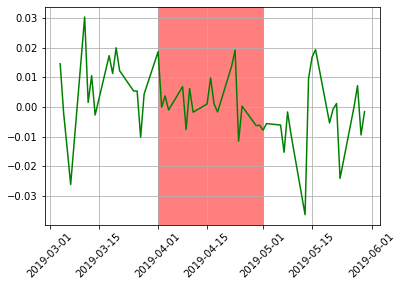

In [117]:
get_only_stock_plot(amazon_df,datetime.date(2019,3,1),datetime.date(2019,5,31))

# 5.) Microsoft

# 2016 JUNE
In June 2016, Microsoft's stock dropped after the "Brexit" vote in the UK, which caused market uncertainty and volatility.

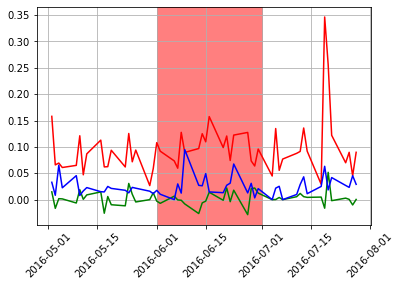

In [118]:
get_given_period_plot(microsoft_df,datetime.date(2016,5,1),datetime.date(2016,7,31))

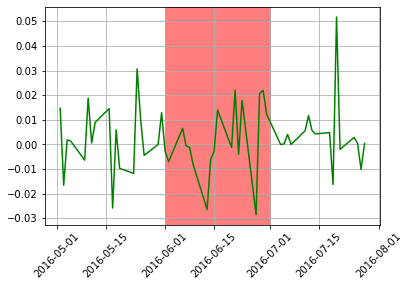

In [119]:
get_only_stock_plot(microsoft_df,datetime.date(2016,5,1),datetime.date(2016,7,31))

## 2018 OCTOBER
In October 2018, Microsoft's stock dropped after reports of weaker-than-expected revenue growth in its Azure cloud computing business, which were widely discussed on social media and in the news.

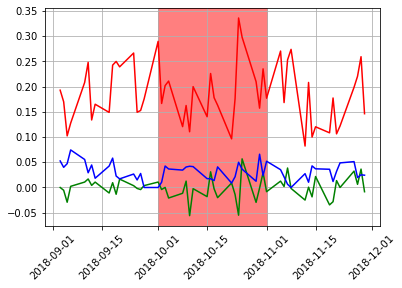

In [120]:
get_given_period_plot(microsoft_df,datetime.date(2018,9,1),datetime.date(2018,11,30))

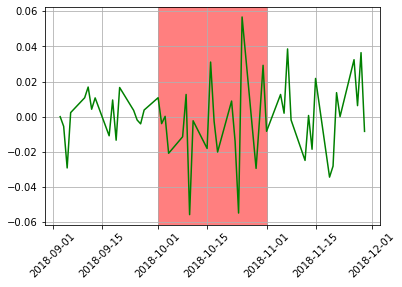

In [121]:
get_only_stock_plot(microsoft_df,datetime.date(2018,9,1),datetime.date(2018,11,30))

## 2019 JULY
In July 2019, Microsoft's stock rose after a report that the company was in talks to acquire a popular chat app, which was widely discussed on social media and in financial news.

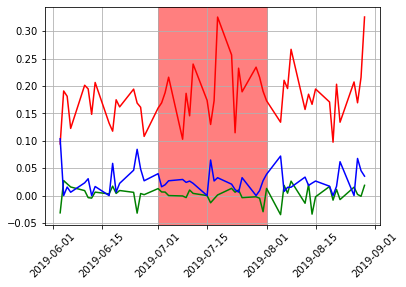

In [122]:
get_given_period_plot(microsoft_df,datetime.date(2019,6,1),datetime.date(2019,8,31))

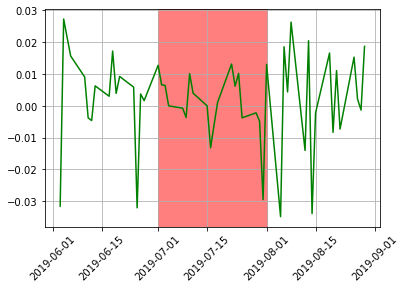

In [123]:
get_only_stock_plot(microsoft_df,datetime.date(2019,6,1),datetime.date(2019,8,31))